<a href="https://colab.research.google.com/github/Seba-Nicola/Proyecto-Data-Science/blob/main/ProyectoDSParteI_Nicola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Data Science I

##Abstract

El proyecto se enfoca en el análisis de un conjunto de datos sobre hospitalizaciones relacionadas con diabetes. El Dataset recopila datos de atención clínica en 130 hospitales de Estados Unidos. Cada registro representa el ingreso hospitalario de un paciente con diagnóstico de diabetes cuya estancia duró entre uno y catorce días, reúne mas de 100.000 registos y 25 variables, entre ellas información demográfica, administrativa y clínica.

El objetivo principal es identificar patrones y factores de riesgo asociados con la readmisión hospitalaria temprana (≤ 30 días), un indicador clave para evaluar la calidad asistencial y optimizar la gestión de recursos sanitarios.

El dataset contiene variables categóricas (como raza, género, grupo etario, especialidad médica de atención, fuente de admisión y diagnósticos) y variables numéricas (como días de internación, cantidad de procedimientos, número de medicamentos y procedimientos de laboratorio). El dataset no presentar valores faltantes, facilita un flujo de trabajo enfocado en el análisis exploratorio y el desarrollo de modelos predictivos, evitando las complejidades propias de la imputación.

Las preguntas centrales incluyen:

¿Se observan diferencias en la tasa de readmisión por género, raza o fuente de admisión?

¿Cuáles son las distribuciones típicas de los días de internación y de los medicamentos administrados? ¿Cómo se relacionan a la tasa de readmisión?

¿Existen relaciones entre la complejidad clínica (número de diagnósticos) y la probabilidad de readmisión?

Para abordarlas, se aplicarán visualizaciones univariadas, bivariadas y multivariadas, así como resúmenes estadísticos. El análisis visual permitirá detectar patrones, identificar posibles outliers y explorar asociaciones iniciales entre variables. Las representaciones gráficas se complementarán con medidas descriptivas (mediana, media, rango intercuartílico, proporciones) que ofrezcan contexto numérico a las tendencias observadas.

En conclusión, este trabajo se enmarca en la primera etapa de un proyecto mayor, orientado a construir un modelo de predicción de readmisión. Los hallazgos preliminares servirán como base para refinar hipótesis, seleccionar variables relevantes y definir la estrategia de modelado, con el propósito final de contribuir a una atención médica más eficiente y personalizada.

##Desarrollo

####Importación de Librerías

In [55]:
#Importación librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####Descripción de variables

In [56]:
#Lectura del Dataset
url='https://raw.githubusercontent.com/Seba-Nicola/Proyecto-Data-Science/main/diabetes_hospital.xlsx'
df= pd.read_excel(url)
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary,readmit_30_days
0,Caucasian,Female,'30 years or younger',Other,Referral,1,Other,41,0,1,...,No,No,False,False,False,False,False,NO,0,0
1,Caucasian,Female,'30 years or younger','Discharged to Home',Emergency,3,Missing,59,0,18,...,Ch,Yes,False,False,False,False,False,>30,1,0
2,AfricanAmerican,Female,'30 years or younger','Discharged to Home',Emergency,2,Missing,11,5,13,...,No,Yes,False,False,False,True,True,NO,0,0
3,Caucasian,Male,'30-60 years','Discharged to Home',Emergency,2,Missing,44,1,16,...,Ch,Yes,False,False,False,False,False,NO,0,0
4,Caucasian,Male,'30-60 years','Discharged to Home',Emergency,1,Missing,51,0,8,...,Ch,Yes,False,False,False,False,False,NO,0,0


In [57]:
#Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   discharge_disposition_id  101766 non-null  object
 4   admission_source_id       101766 non-null  object
 5   time_in_hospital          101766 non-null  int64 
 6   medical_specialty         101766 non-null  object
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  primary_diagnosis         101766 non-null  object
 11  number_diagnoses          101766 non-null  int64 
 12  max_glu_serum             5346 non-null    object
 13  A1Cresult                 17018 non-null   object
 14  insu

**rece:** grupo étnico del paciente (ej: Caucasian, AfricanAmerican, Asian, etc.).

**gender:** sexo del paciente (ej: Female, Male, Unknown/Invalid).

**age:** grupo etario del paciente (ej: '30 years or younger', '30-60 years', 'Over 60 years').

**discharge_disposition:** Destino del paciente al momento de alta (ej: Discharged to Home, Other).

**admission_source_id:** Fuente de admisión hospitalaria (ej: Referral, Emergency, Other).

**time_in_hospital:** duración de la hospitalización (días).

**medical_speciality:** especialidad del profesional que atendió al paciente.

**num_lab_procedures**: número de laboratorios realizados en la estadia.

**num_procedures:** número de procedimientos médicos.

**num_medications:** cantidad de medicamentos administrados.

**primary_diagnosis:** diagnóstico principal del paciente según codificación.

**max_glu_serum:** valor máximo de glucosa en suero durante la estancia (categorizado).

**A1Cresult:** resultado de la prueba A1C (hemoglobina glicosilada), categorizado.

**insulin**: estatus del tratamiento con insulina durante la estancia (ej: No, Steady, Up, Down).

**change:** indica si hubo un cambio de medicación durante la estancia.

**diabetesMed** indica si el paciente recibió medicación para la diabétes.

**had_inpatient_days:** indica si el paciente tuvo días de hospitalización.

**had_outpatient_days:** indica si el paciente tuvo días de atención ambulatoria previos.

**readmitted:**Estado de readmisión del paciente (NO, >30, ).

**readmit_binary:** variable binaria de readmición.

**readmit_30_days:** indica si la persona fue readmitida dentro de los 30 días.




In [58]:
#Tamaño del dataset
df.shape

(101766, 25)

In [59]:
#Descripción de variables numéricas
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmit_binary,readmit_30_days
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,7.422607,0.460881,0.111599
std,2.985108,19.674362,1.705807,8.127566,1.933600,0.498470,0.314874
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,6.000000,0.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,8.000000,0.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,9.000000,1.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,16.000000,1.000000,1.000000


In [60]:
# Valores con 0
columnas = df.columns[0:]
nun_missing = (df[columnas] == 0).sum()
print(nun_missing)

race                            0
gender                          0
age                             0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty               0
num_lab_procedures              0
num_procedures              46652
num_medications                 0
primary_diagnosis               0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
insulin                         0
change                          0
diabetesMed                     0
medicare                    69327
medicaid                    98234
had_emergency               90383
had_inpatient_days          67630
had_outpatient_days         85027
readmitted                      0
readmit_binary              54864
readmit_30_days             90409
dtype: int64


In [61]:
# Valores nulos
nulos_total = df.isnull().sum().sum()
nulos_por_col = df.isnull().sum().sort_values(ascending=False)
display(nulos_por_col.head(20))
print("Nulos totales:", int(nulos_total))

,0
max_glu_serum,96420
A1Cresult,84748
age,0
gender,0
admission_source_id,0
time_in_hospital,0
medical_specialty,0
discharge_disposition_id,0
race,0
num_procedures,0


Nulos totales: 181168


###Visualizaciones

####Tasa de Readmisión por Género

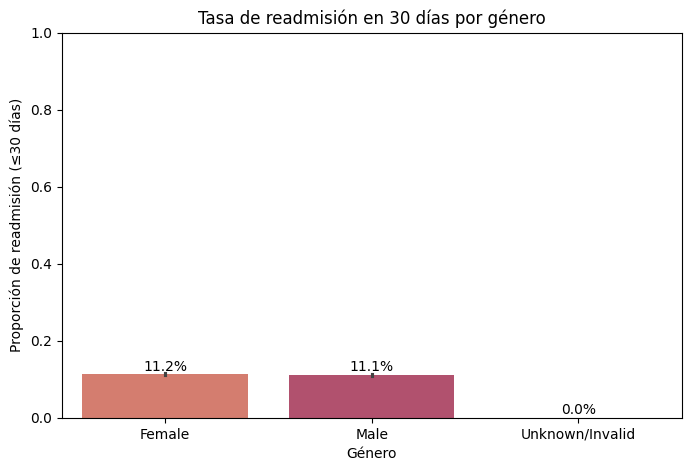

In [62]:
#Tasa de readmisión por género
plt.figure(figsize=(8,5))
sns.barplot(
    x="gender",
    y="readmit_30_days",
    data=df,
    estimator=lambda x: sum(x)/len(x),
    hue="gender",
    palette="flare"
)
plt.ylabel("Proporción de readmisión (≤30 días)")
plt.xlabel("Género")
plt.title("Tasa de readmisión en 30 días por género")
plt.ylim(0,1)

# Etiquetas de porcentaje
tasa_genero = df.groupby("gender")["readmit_30_days"].mean()
for i, (cat, val) in enumerate(tasa_genero.items()):
    plt.text(i, val+0.01, f"{val:.1%}", ha='center')

plt.show()

- La **proporción de readmisión (≤30 días)** es similar entre *Female* y *Male*.  
- Diferencias pequeñas sugieren que el **género** no es un determinante fuerte en este dataset.

####Tasa de Readmisión por Raza



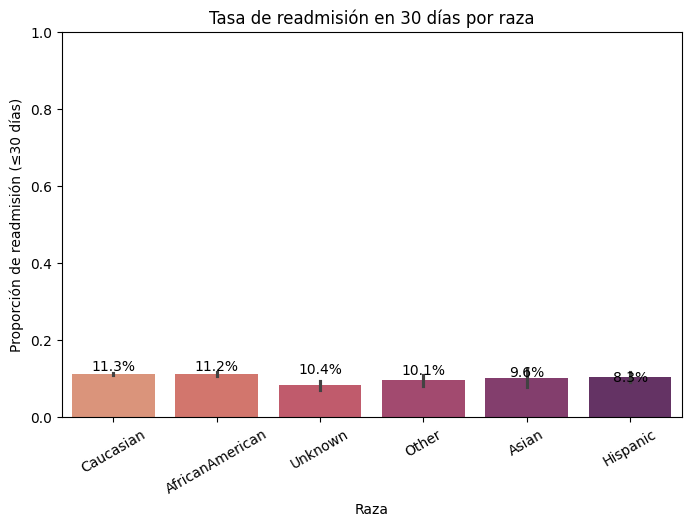

In [63]:
#Tasa de readmisión por raza
plt.figure(figsize=(8,5))
sns.barplot(
    x="race",
    y="readmit_30_days",
    data=df,
    estimator=lambda x: sum(x)/len(x),
    hue="race",
    palette="flare"
)
plt.ylabel("Proporción de readmisión (≤30 días)")
plt.xlabel("Raza")
plt.title("Tasa de readmisión en 30 días por raza")
plt.ylim(0,1)
plt.xticks(rotation=30)

# Etiquetas
tasa_race = df.groupby("race")["readmit_30_days"].mean().sort_values(ascending=False)
for i, (cat, val) in enumerate(tasa_race.items()):
    plt.text(i, val+0.01, f"{val:.1%}", ha='center')

plt.show()

**Interpretación – Tasa de readmisión por raza**  
- Las **tasas** entre grupos raciales son cercanas (brecha de pocos puntos porcentuales).  
- *Unknown* refleja **falta de registro** más que un patrón clínico.

####Tasa de Readmisión por Fuente de Admisión

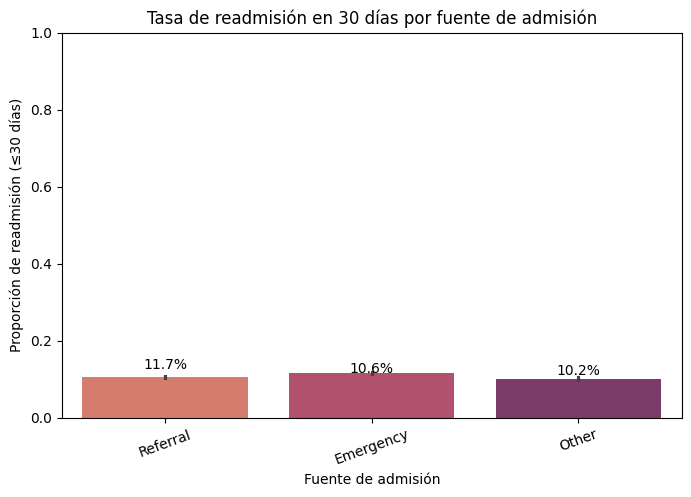

In [64]:
#Tasa de readmisión por fuente de admisión
plt.figure(figsize=(8,5))
sns.barplot(
    x="admission_source_id",
    y="readmit_30_days",
    data=df,
    estimator=lambda x: sum(x)/len(x),
    hue="admission_source_id",
    palette="flare"
)
plt.ylabel("Proporción de readmisión (≤30 días)")
plt.xlabel("Fuente de admisión")
plt.title("Tasa de readmisión en 30 días por fuente de admisión")
plt.ylim(0,1)
plt.xticks(rotation=20)

# Etiquetas
tasa_admission = df.groupby("admission_source_id")["readmit_30_days"].mean().sort_values(ascending=False)
for i, (cat, val) in enumerate(tasa_admission.items()):
    plt.text(i, val+0.01, f"{val:.1%}", ha='center')

plt.show()

**Interpretación – Tasa de readmisión por fuente de admisión**  
- La vía **Emergency** tiende a mayor readmisión (casos más agudos).  
- **Referral** y **Other** suelen ser más bajos.  
- La **vía de ingreso** puede ser útil para segmentar riesgo.

####Variables Numéricas

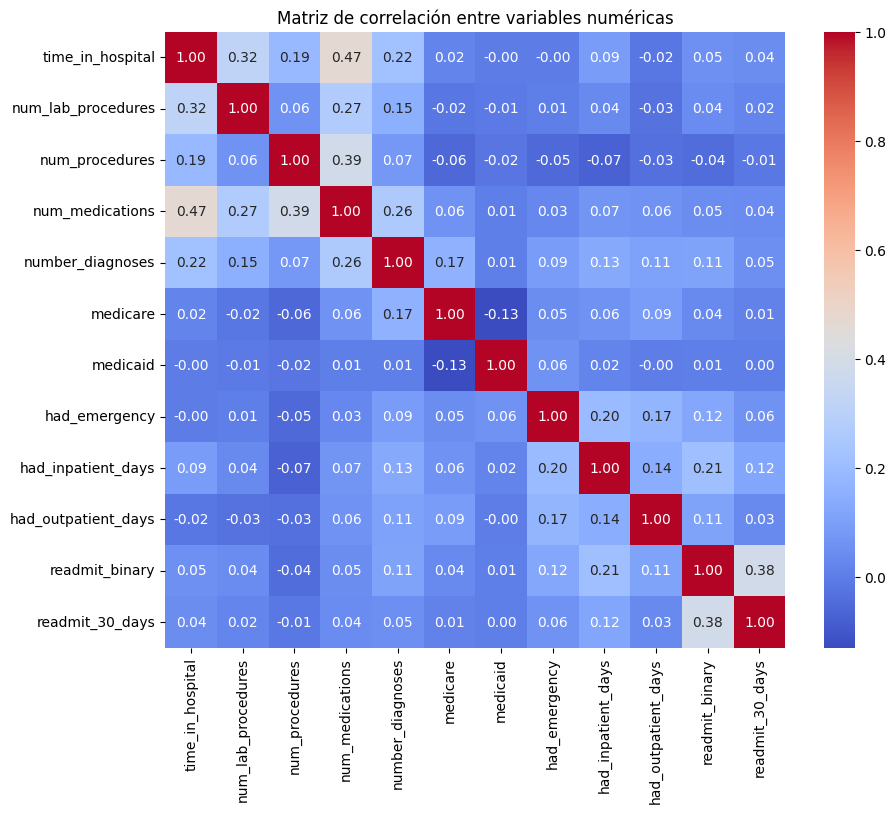

In [65]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

**Interpretación** – `num_medications` tiene un mayor índice de correlación con `time_in_hospital`, `num_procedures`,`num_lab_procedures` y `num_diagnosis`

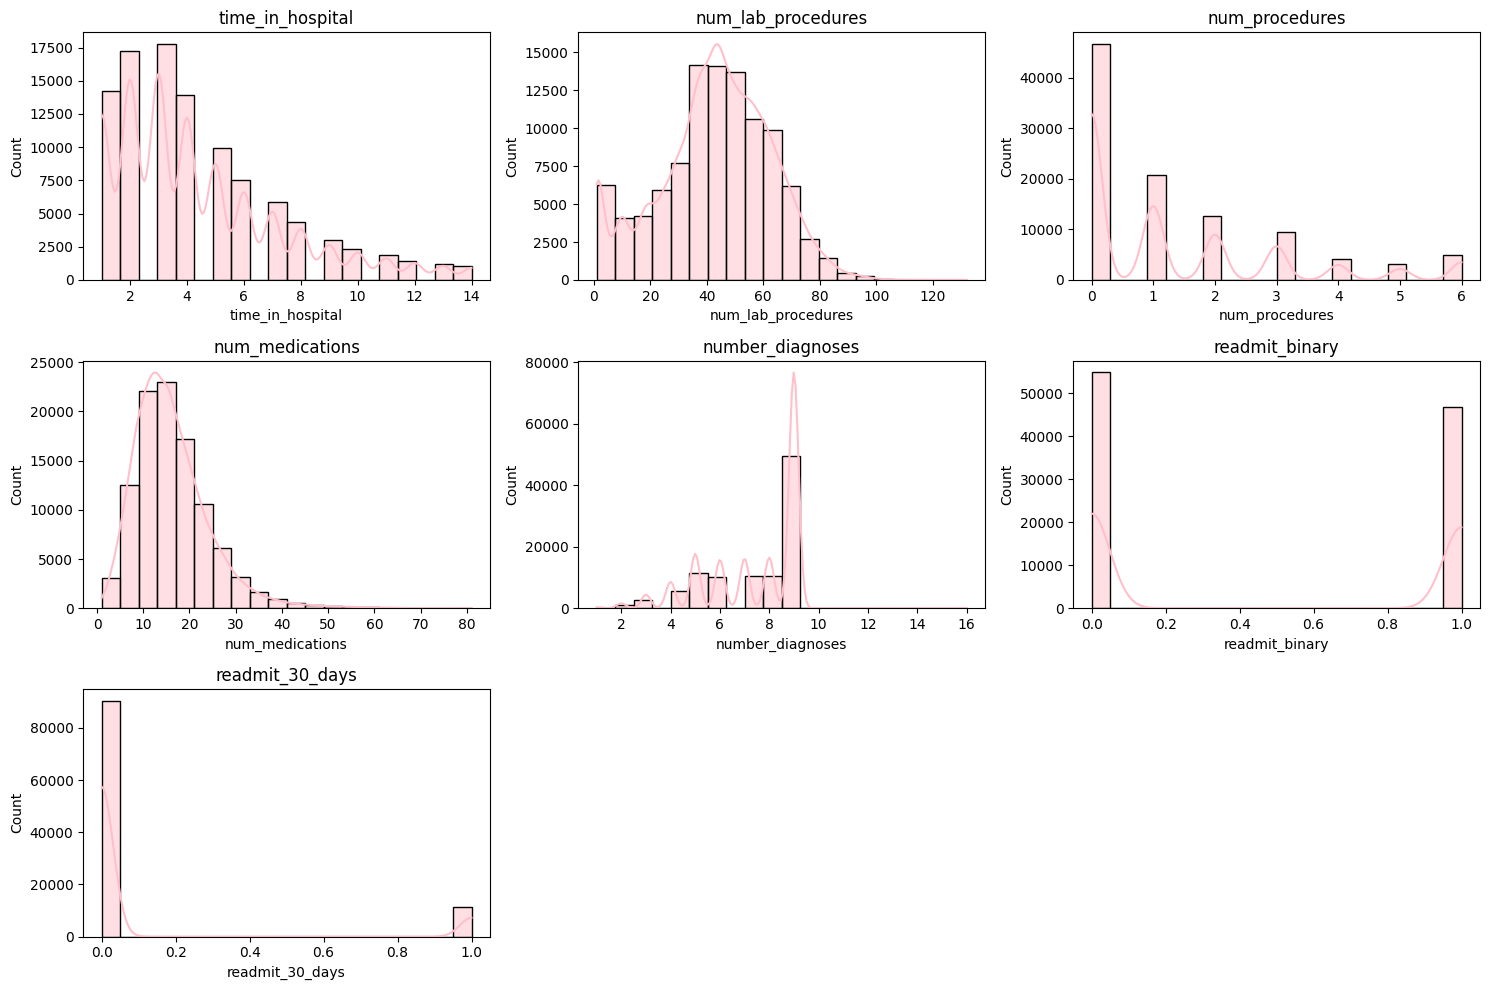

In [66]:
# Variables numéricas
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color="pink")
    plt.title(col)
plt.tight_layout()
plt.show()

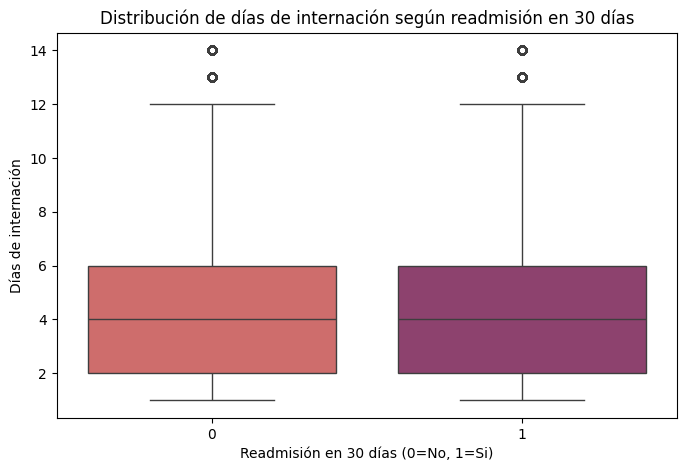

In [67]:
# Distribución de días de admisión según readmisión en 30 días
plt.figure(figsize=(8,5))
sns.boxplot(
    x="readmit_30_days",
    y="time_in_hospital",
    data=df,
    hue="readmit_30_days",
    legend=False,
    palette="flare"
)
plt.xlabel("Readmisión en 30 días (0=No, 1=Si)")
plt.ylabel("Días de internación")
plt.title("Distribución de días de internación según readmisión en 30 días")
plt.show()

**Interpretación – `time_in_hospital` según readmisión**  
-No se observan grandes diferencias según la visualización de esta variable.

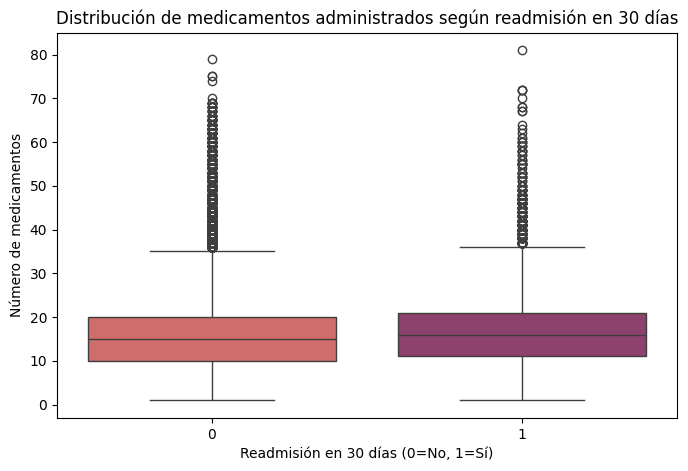

In [68]:
# Distribución de medicamentos administrados según readmisión en 30 días
plt.figure(figsize=(8,5))
sns.boxplot(
    x="readmit_30_days",
    y="num_medications",
    data=df,
    hue="readmit_30_days",
    legend=False,
    palette="flare",
    )
plt.xlabel("Readmisión en 30 días (0=No, 1=Sí)")
plt.ylabel("Número de medicamentos")
plt.title("Distribución de medicamentos administrados según readmisión en 30 días")
plt.show()

**Interpretación – `num_medications` según readmisión**  
- Una **mediana** más alta en readmitidos sugiere que la cantidad de medicamentos suministrados puede ser un factor influyente.  
- Puede haber efecto por **outliers**.

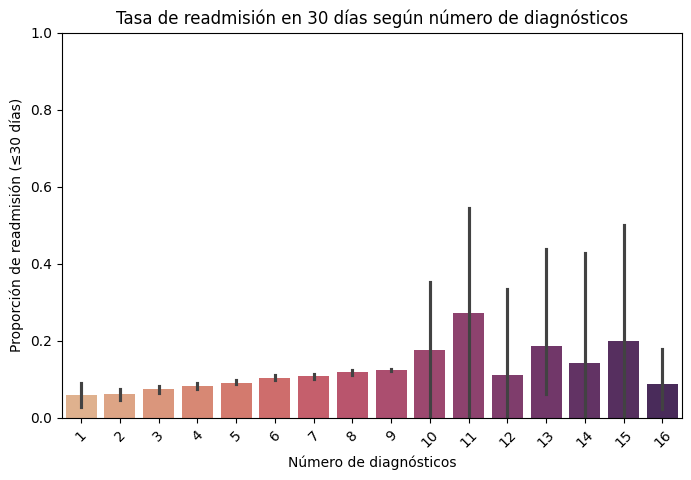

In [69]:
# Tasa de readmisión en 30 días según número de diagnósticos
plt.figure(figsize=(8,5))
sns.barplot(
    x="number_diagnoses",
    y="readmit_30_days",
    data=df,
    estimator=lambda x: sum(x)/len(x),
    hue="number_diagnoses",
    legend=False,
    palette="flare",
)
plt.xlabel("Número de diagnósticos")
plt.ylabel("Proporción de readmisión (≤30 días)")
plt.title("Tasa de readmisión en 30 días según número de diagnósticos")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

**Interpretación – `num_diagnosis` según readmisión**  
- Tendencia de la tasa creciente a mayor número de diagnosticos.

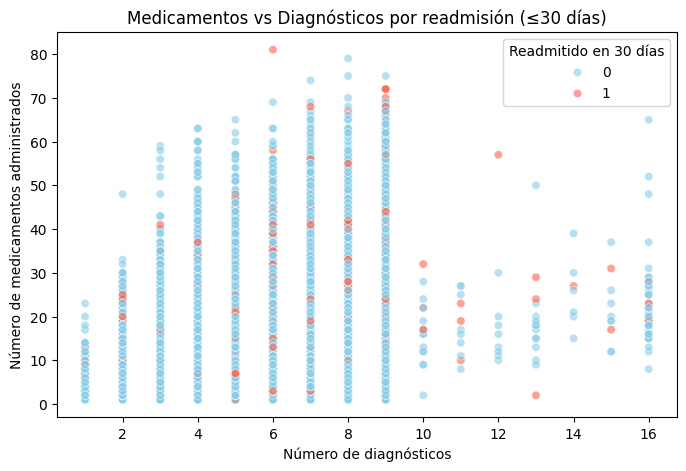

In [70]:
# Reingresos en 30 días en función de número de medicamentos administrados y número de diagnósticos
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="number_diagnoses",
    y="num_medications",
    hue="readmit_30_days",
    hue_order=[0,1],
    alpha=0.6,
    palette={0: "skyblue", 1: "tomato"}
)
plt.xlabel("Número de diagnósticos")
plt.ylabel("Número de medicamentos administrados")
plt.title("Medicamentos vs Diagnósticos por readmisión (≤30 días)")
plt.legend(title="Readmitido en 30 días")
plt.show()

**Interpretación**
Se estudiaron las relaciones de dos variables identificadas como influyentes en la tasa de readmisión, – `num_medications` y `num_diagnosis`. No se observa un patrón claro en el gráfico.